In [125]:
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
scenario = "testing"
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 13})
plt.rc('ytick', labelsize=13) 
plt.rc('xtick', labelsize=13) 

In [126]:
scenarios = ["separate_nuclear", "nuclear_together"]

In [127]:
results = "_" .join(scenarios)
path_to_plots = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ) , "amiris_workflow" , "output", results)
if not os.path.exists(path_to_plots):
    os.mkdir(path_to_plots)

In [128]:
energy_exchange = {}
for i in scenarios:
    df_name = f'df_{i}'  # Create a unique name for each DataFrame
    path_to_results1 =os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ) , "amiris_workflow" , "output",  i+".xlsx")
    data =  pd.read_excel(path_to_results1, sheet_name='energy_exchange', index_col=0)
    energy_exchange[df_name] = pd.DataFrame(data)


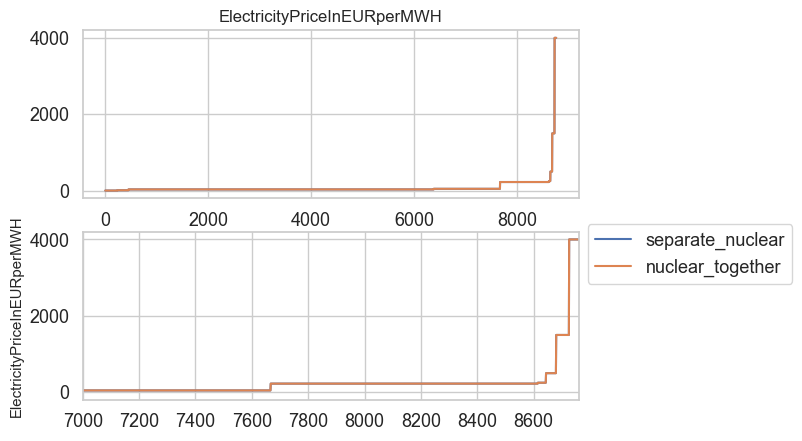

In [129]:

fig, axes= plt.subplots(nrows=2, ncols=1)
for df_name, df in energy_exchange.items():
    sorted_elec_prices = df["ElectricityPriceInEURperMWH"].copy()    
    sorted_elec_prices.sort_values(ignore_index=True, inplace=True)
    axs1 = sorted_elec_prices.plot(ax=axes[0])
    plt.xlim([7000, 8760])
    axs2 = sorted_elec_prices.plot(ax=axes[1])
plt.legend(scenarios, fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
plt.ylabel('ElectricityPriceInEURperMWH', fontsize='small')
axes[0].set_title('ElectricityPriceInEURperMWH')

fig.savefig(path_to_plots + '/' + 'elec_prices.png', bbox_inches='tight', dpi=300) 

In [130]:
residual_load = {}
for i in scenarios:
    df_name = f'df_{i}'  # Create a unique name for each DataFrame
    path_to_results1 =os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ) , "amiris_workflow" , "output",  i+".xlsx")
    data =  pd.read_excel(path_to_results1, sheet_name='residual_load', index_col=0)
    residual_load[df_name] = pd.DataFrame(data)

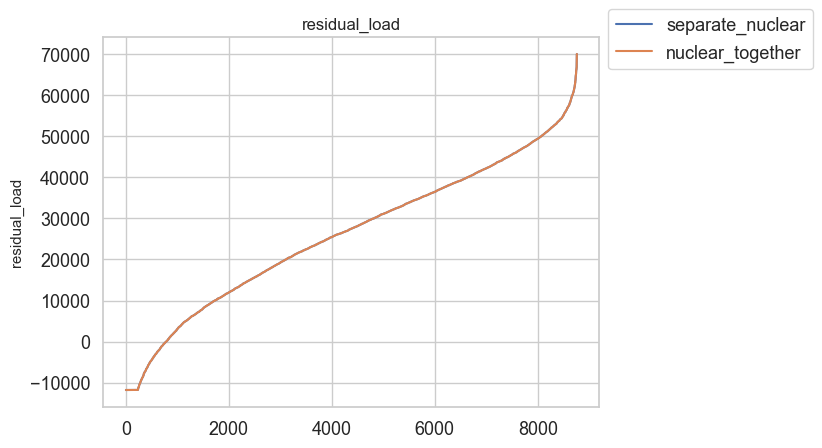

In [131]:
fig, axes= plt.subplots(nrows=1, ncols=1)
for df_name, df in residual_load.items():
    sorted_residual_load = df["residual_load_actual_infeed"].copy()    
    sorted_residual_load.sort_values(ignore_index=True, inplace=True)
    axs1 = sorted_residual_load.plot()
plt.legend(scenarios, fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
plt.ylabel('residual_load', fontsize='small')
axes.set_title('residual_load')

fig.savefig(path_to_plots + '/' + 'residual_load.png', bbox_inches='tight', dpi=300) 

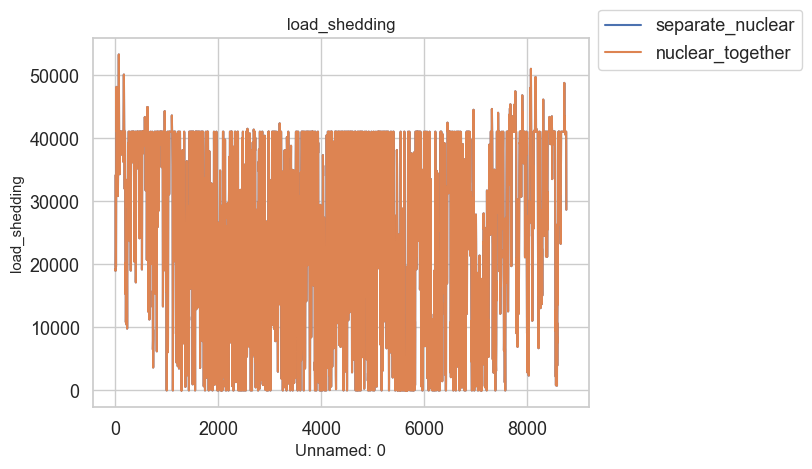

In [132]:
hourly_generation = {}
for i in scenarios:
    df_name = f'df_{i}'  # Create a unique name for each DataFrame
    path_to_results1 =os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ) , "amiris_workflow" , "output",  i+".xlsx")
    data =  pd.read_excel(path_to_results1, sheet_name='hourly_generation', index_col=0)
    hourly_generation[df_name] = pd.DataFrame(data)
    
fig, axes= plt.subplots(nrows=1, ncols=1)
for df_name, df in hourly_generation.items():
    sorted_load_shedding = df["load_shedding"].copy()    
    axs1 = sorted_load_shedding.plot()
plt.legend(scenarios, fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
plt.ylabel('load_shedding', fontsize='small')
axes.set_title('load_shedding')

fig.savefig(path_to_plots + '/' + 'load_shedding_all.png', bbox_inches='tight', dpi=300)     

LOLEdf_separate_nuclear   67 GWh
LOLEdf_nuclear_together   67 GWh


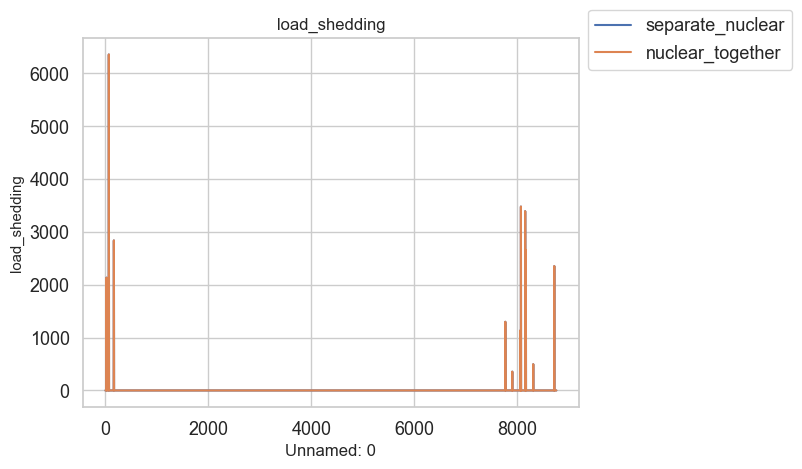

In [133]:
fig, axes= plt.subplots(nrows=1, ncols=1)
for df_name, df in hourly_generation.items():
    load_shedding = df["unit_400000000"].copy()
    print("LOLE" + df_name +"   " +  str(int((load_shedding.sum()/1000))) + " GWh")
    axs1 = load_shedding.plot()
plt.legend(scenarios, fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
plt.ylabel('load_shedding', fontsize='small')
axes.set_title('load_shedding')

fig.savefig(path_to_plots + '/' + 'load_shedding.png', bbox_inches='tight', dpi=300) 

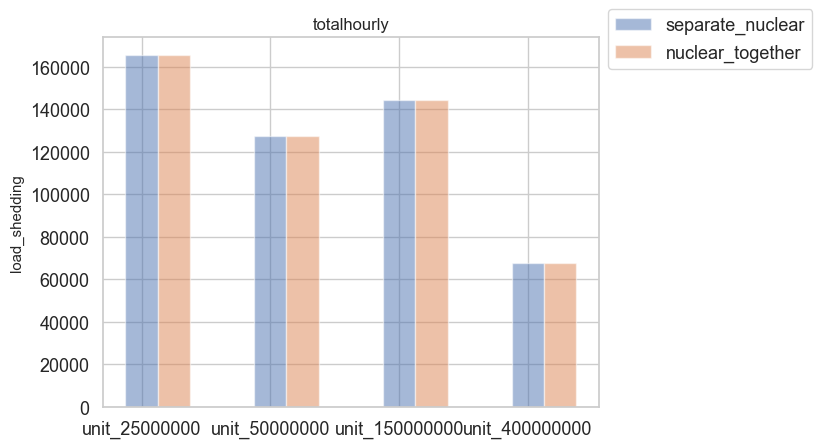

In [134]:
fig, axes= plt.subplots(nrows=1, ncols=1)
n = 0
for df_name, df in hourly_generation.items():
    df = df[["unit_25000000","unit_50000000"  ,"unit_150000000" , "unit_400000000"]]
    totalhourly = df.sum(axis=0)
    offset = 0.25 * n
    width = 0.25
    x = np.arange(len(totalhourly))
    axes.bar( offset + x, totalhourly, width,   alpha=0.5)
    n =+ 1 
plt.legend(scenarios, fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
plt.ylabel('load_shedding', fontsize='small')
axes.set_title('totalhourly')
axes.set_xticks(x, totalhourly.index)
fig.savefig(path_to_plots + '/' + 'totalhourly.png', bbox_inches='tight', dpi=300) 